In [1]:
from typing import Annotated

from langchain_core.messages import AnyMessage, AIMessage

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage


from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",google_api_key=api_key,)
model.invoke("Hello, how are you?")

NameError: name 'os' is not defined

In [5]:
from typing import Annotated

from langchain_core.messages import AnyMessage, AIMessage

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage

import os 
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",google_api_key=api_key,)
model.invoke("Hello, how are you?")

ChatGoogleGenerativeAIError: Error calling model 'gemini-2.5-flash' (INVALID_ARGUMENT): 400 INVALID_ARGUMENT. {'error': {'code': 400, 'message': 'API Key not found. Please pass a valid API key.', 'status': 'INVALID_ARGUMENT', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'API_KEY_INVALID', 'domain': 'googleapis.com', 'metadata': {'service': 'generativelanguage.googleapis.com'}}, {'@type': 'type.googleapis.com/google.rpc.LocalizedMessage', 'locale': 'en-US', 'message': 'API Key not found. Please pass a valid API key.'}]}}

AIMessage(content='Hello! I am functioning well and ready to assist you.\n\nHow may I help you today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b366d-d1d5-7d23-90fd-d6a9de6b29c9-0', usage_metadata={'input_tokens': 7, 'output_tokens': 48, 'total_tokens': 55, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 28}})

In [55]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [56]:
def chat_node(state: ChatState):

    decision = interrupt({
        "type": "approval",
        "reason": "Model is about to answer a user question.",
        "question": state["messages"][-1].content,
        "instruction": "Approve this question? yes/no"
    })
    
    if decision["approved"] == 'no':
        return {"messages": [AIMessage(content="Not approved.")]}

    else:
        response = llm.invoke(state["messages"])
        return {"messages": [response]}

In [57]:
# 3. Build the graph: START -> chat -> END
builder = StateGraph(ChatState)

builder.add_node("chat", chat_node)

builder.add_edge(START, "chat")
builder.add_edge("chat", END)

# Checkpointer is required for interrupts
checkpointer = MemorySaver()

# Compile the app
app = builder.compile(checkpointer=checkpointer)

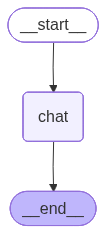

In [58]:
app

In [59]:
# Create a new thread id for this conversation
config = {"configurable": {"thread_id": '1234'}}

# ---- STEP 1: user asks a question ----
initial_input = {
    "messages": [
        ("user", "Explain gradient descent in very simple terms.")
    ]
}

# Invoke the graph for the first time
result = app.invoke(initial_input, config=config)

In [60]:
result

{'messages': [HumanMessage(content='Explain gradient descent in very simple terms.', additional_kwargs={}, response_metadata={}, id='e6230987-ee96-4263-992c-17ab2641f136')],
 '__interrupt__': [Interrupt(value={'type': 'approval', 'reason': 'Model is about to answer a user question.', 'question': 'Explain gradient descent in very simple terms.', 'instruction': 'Approve this question? yes/no'}, id='fdf30d9c45061484c82826d5414a35a8')]}

In [61]:
message = result['__interrupt__'][0].value
message

{'type': 'approval',
 'reason': 'Model is about to answer a user question.',
 'question': 'Explain gradient descent in very simple terms.',
 'instruction': 'Approve this question? yes/no'}

In [62]:

user_input = input(f"\nBackend message - {message} \n Approve this question? (y/n): ")


In [63]:
# Resume the graph with the approval decision
final_result = app.invoke(
    Command(resume={"approved": user_input}),
    config=config,
)


In [64]:

print(final_result["messages"][-1].content)


Imagine you're a **blindfolded person** standing on a **hilly landscape**.

Your goal is to find the **absolute lowest point in the valley** (which represents the "best solution" or "minimum error" for a problem). But you can't see!

Here's how you'd do it, which is exactly how Gradient Descent works:

1.  **Feel the Slope:** You stand still for a moment and carefully feel the ground directly under your feet. "Is it sloping up this way? Down that way? Flat here?" You figure out the direction where the ground slopes **downwards the steepest**. This "feeling the slope" is the **"gradient"** part.

2.  **Take a Small Step:** Once you know the steepest downhill direction, you take a **small step** in that direction. This is the **"descent"** part. You don't take a huge leap, because you might overshoot the bottom or step off a cliff you can't see!

3.  **Repeat:** You repeat the process:
    *   Stop, feel the new slope.
    *   Take another small step in the new steepest downhill directio